In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [100]:
iris = load_iris()

In [101]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [102]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [103]:
target = pd.DataFrame(iris.target,columns=["target"])

In [104]:
data = pd.concat([data,target],axis=1)

In [105]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [107]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [108]:
data.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [109]:
data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [110]:
# DATA is ready to Train

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X=data.iloc[:,:4]
y=data['target']

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
classifier = DecisionTreeClassifier()

In [116]:
# By default it will be  DecisionTreeClassifier(criterion='gini',..)

In [117]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

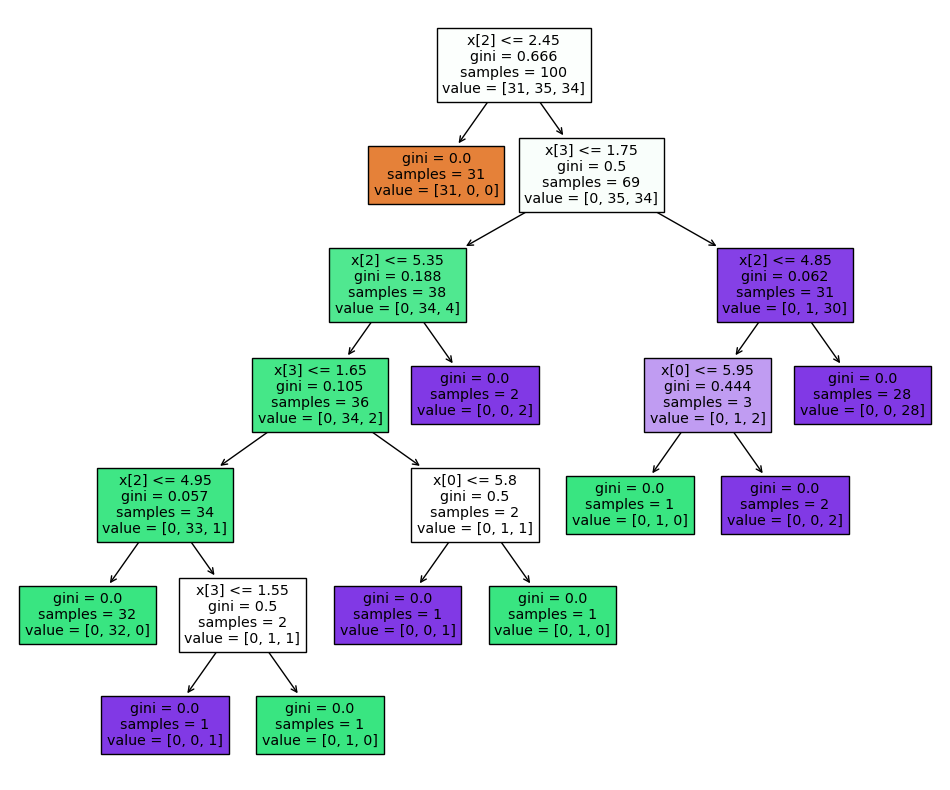

In [119]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [120]:
## Post Pruning

clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [121]:
y_pred = clf.predict(X_test)

In [122]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [123]:
from sklearn.metrics import accuracy_score,classification_report

In [127]:
score = accuracy_score(y_pred,y_test)
print("R2 Square :",score)
print(classification_report(y_pred,y_test))

R2 Square : 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [128]:
# Prepruning and Hyperparameter Tuning for Huge Data

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Hyperparameter tuning

In [130]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2']
}

In [132]:
# Model Selection 
from sklearn.model_selection import GridSearchCV

In [144]:
ds_clf = DecisionTreeClassifier()

In [145]:
gs_clf = GridSearchCV(clf,param_grid=parameter,scoring='accuracy')

In [146]:
gs_clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [147]:
gs_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

### After finding the best parameter we will apply those parameter and train data again

In [148]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 4,max_features= 'log2',splitter='best')

In [149]:
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [154]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [155]:
y_pred = dt_clf.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score,classification_report

In [157]:
score = accuracy_score(y_pred,y_test)
print("R2 Square After Hyper parameter:",score)
print(classification_report(y_pred,y_test))

R2 Square After Hyper parameter: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

